In [2]:
# install conda and rdkit packages
#rdkit package allows you to compute molecular descriptors for the compounds in the data set that we compiled

# !conda env list
# !conda activate my-rdkit-env

# Molecular descriptors are numerical values that describe the properties of a molecule, such as its size, shape, and
# chemical structure. These descriptors are calculated using algorithms that analyze the molecular structure and 
# composition, and they provide useful information for predicting a molecule's behavior in various chemicaland
# biological systems 

#https://www.youtube.com/watch?v=9i9SY6Nd1Zw
#In simple terms molecular descriptors are numerical representaion of molecules.
# Molecular descriptors are used for QSAR and QSPR in drug discovery
import pandas as pd
df = pd.read_csv('C:/Users/laksh/Documents/DM_PROJECT/Coronavirus/cv_bioactivity_preprocessed_data.csv')
df.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,active,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],active,2000.0


# Calculate Lipinski descriptors

In [3]:

# Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for 
#evaluating the druglikeness of compounds. 
#Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME)
#that is also known as the pharmacokinetic profile.
#Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

# The Lipinski's Rule stated the following:

# Molecular weight < 500 Dalton
# Octanol-water partition coefficient (LogP) < 5
# Hydrogen bond donors < 5
# Hydrogen bond acceptors < 10

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

#Calculate discriptors
# def lipinski(smiles, verbose=False):

#     moldata= []
#     for element in smiles:
#         mol=Chem.MolFromSmiles(element)
#         moldata.append(mol)
    
# #     print("moldata",moldata)
#     baseData= np.arange(1,1)
#     i=0  
#     for mol in moldata:        
       
#         desc_MolWt = Descriptors.MolWt(mol)
#         desc_MolLogP = Descriptors.MolLogP(mol)
#         desc_NumHDonors = Lipinski.NumHDonors(mol)
#         desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
#         row = np.array([desc_MolWt,
#                         desc_MolLogP,
#                         desc_NumHDonors,
#                         desc_NumHAcceptors])   
    
#         if(i==0):
#             baseData=row
#         else:
#             baseData=np.vstack([baseData, row])
#         i=i+1      
    
#     columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
#     descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
#     return descriptors

def lipinski(smiles, verbose=False):
    moldata = []
    for element in smiles:
        mol = Chem.MolFromSmiles(element)
        if mol is not None:   # filter out invalid SMILES strings
            moldata.append(mol)
    
    if verbose: print(f'Processing {len(moldata)} molecules')
    
    # calculate descriptors
    desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors = [], [], [], []
    for mol in moldata:
        desc_MolWt.append(Descriptors.MolWt(mol))
        desc_MolLogP.append(Descriptors.MolLogP(mol))
        desc_NumHDonors.append(Lipinski.NumHDonors(mol))
        desc_NumHAcceptors.append(Lipinski.NumHAcceptors(mol))
    
    # create output DataFrame
    df_lipinski = pd.DataFrame({'MolWt': desc_MolWt, 'MolLogP': desc_MolLogP,
                                'NumHDonors': desc_NumHDonors,
                                'NumHAcceptors': desc_NumHAcceptors})
    return df_lipinski





In [4]:
df_lipinski =lipinski(df.canonical_smiles.astype(str))
df_lipinski

,MolWt,MolLogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0,5
1,415.589,3.81320,0,2
2,421.190,2.66050,0,4
3,293.347,3.63080,0,3
4,338.344,3.53900,0,5
...,...,...,...,...
128,338.359,3.40102,0,5
129,296.366,3.44330,0,3
130,276.291,4.09564,0,3
131,278.307,3.29102,0,3


In [5]:
#checking for null values
new_df_lipinski=pd.DataFrame(df_lipinski)
print("NEW",new_df_lipinski.isna().sum())
print("df_lipinsk",df_lipinski.isnull().sum())

NEW MolWt            0
MolLogP          0
NumHDonors       0
NumHAcceptors    0
dtype: int64
df_lipinsk MolWt            0
MolLogP          0
NumHDonors       0
NumHAcceptors    0
dtype: int64


In [6]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MolWt,MolLogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,active,7200.0,281.271,1.89262,0,5
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,9400.0,415.589,3.81320,0,2
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0,4
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,293.347,3.63080,0,3
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],active,2000.0,338.344,3.53900,0,5
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,10600.0,338.359,3.40102,0,5
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,10100.0,296.366,3.44330,0,3
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,11500.0,276.291,4.09564,0,3
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,10700.0,278.307,3.29102,0,3


In [8]:
# Convert IC50 to pIC50
# To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

# This custom function pIC50() will accept a DataFrame as input and will:

# Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9
 
# Take the molar value and apply -log10
# Delete the standard_value column and create a new pIC50 column

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        if molar>0:
            
            pIC50.append(-np.log10(molar))
        else:
            pIC50.append(float('nan'))
        

    input['pIC50'] = pIC50
    x = input.drop(labels='standard_value_norm', axis=1)
        
    return x

df_combined.standard_value.describe()

-np.log10( (10**-9)* 100000000 )

-np.log10( (10**-9)* 10000000000 )

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x=input.drop(labels='standard_value', axis=1)
        
    return x

#We will first apply the norm_value() function so that the values in the standard_value column is normalized.
df_norm = norm_value(df_combined)
df_norm

df_norm.standard_value_norm.describe()

df_final = pIC50(df_norm)
df_final

#saving the preprocessed data to the csv file
df_final.to_csv("C:/Users/laksh/Documents/DM_PROJECT/Coronavirus/cv_bioactivity_data_pic50.csv", index=False)

df_final.pIC50.describe()

df_2class=df_final[df_final.bioactivity_class != "intermediate"]
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,MolLogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,active,281.271,1.89262,0,5,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,415.589,3.81320,0,2,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0,4,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0,3,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],active,338.344,3.53900,0,5,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0,5,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0,3,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0,3,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0,3,4.970616


# Frequency Plot of Two Bioactivity Classes

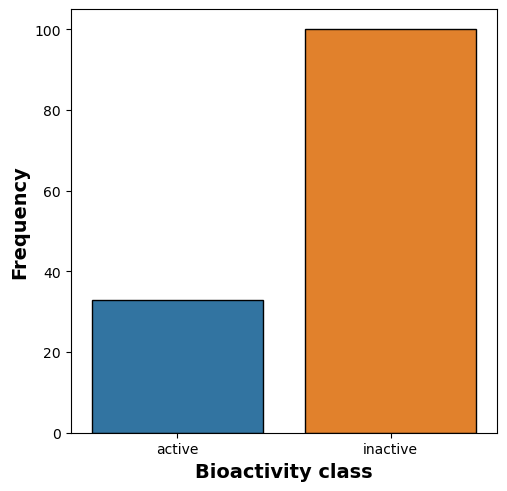

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


# Scatter plot between MW(Molecular Weight) and LogP(Solubility of the Molecule)

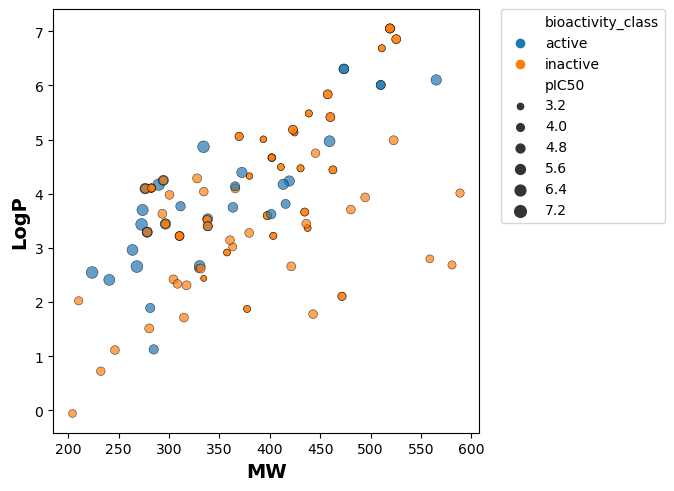

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MolWt', y='MolLogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# Box Plots pIC50 Values

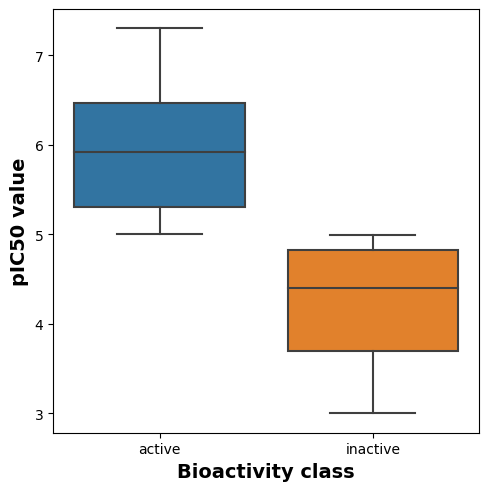

In [23]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

# Box Plots MW (Moleculear Weight)

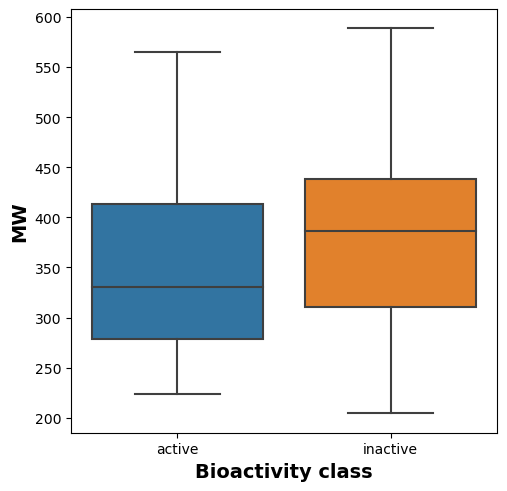

In [26]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MolWt', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

# Box Plot LogP

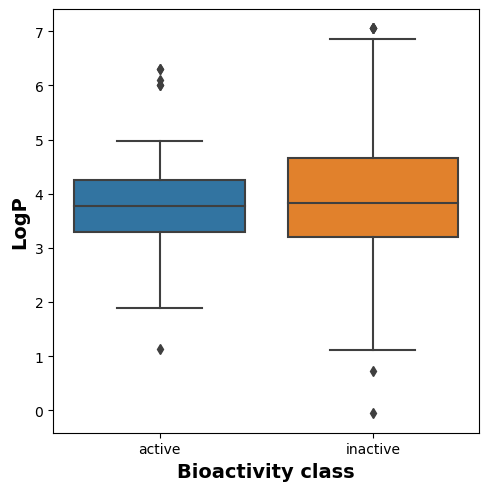

In [27]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MolLogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

# Box Plot NumHDonors

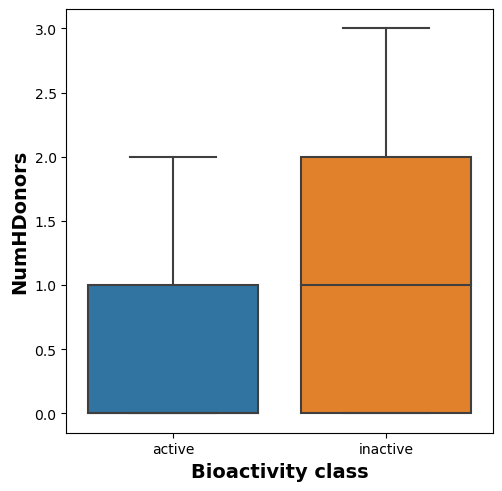

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

# Box Plot NumHAcceptors

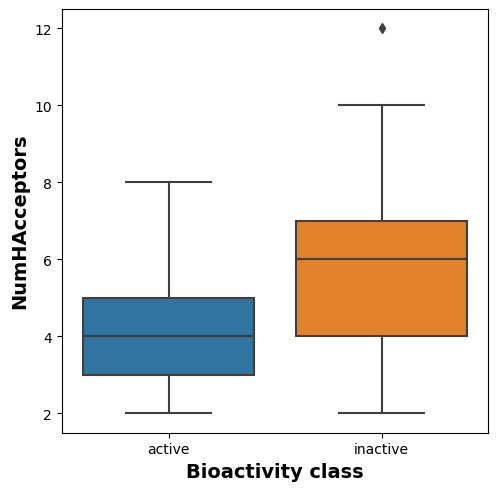

In [29]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

# Statistical analysis | Mann-Whitney U Test

In [16]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed,randn
    from scipy.stats import mannwhitneyu

# seed the random number generator
    seed(1)

# actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]

    selection = [descriptor, 'bioactivity_class']
    df= df_2class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]

# compare samples
    stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    return results
     


In [17]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,3300.0,8.402933e-18,0.05,Different distribution (reject H0)


In [18]:
mannwhitney('MolLogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,MolLogP,1665.5,0.937709,0.05,Same distribution (fail to reject H0)


In [19]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,896.5,0.000031,0.05,Different distribution (reject H0)


In [20]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1098.0,0.00361,0.05,Different distribution (reject H0)


In [21]:
mannwhitney('MolWt')

,Descriptor,Statistics,p,alpha,Interpretation
0,MolWt,1167.5,0.012032,0.05,Different distribution (reject H0)


In [88]:
#Interpretation of Statistical Results
# Box Plots
# pIC50 values
# Taking a look at pIC50 values, the actives and inactives displayed *statistically significant difference*,
# which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

# Lipinski's descriptors
# Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited *no difference* between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows *statistically significant difference* between actives and inactives.